# Анализ программы лояльности строительного магазина

Заказчик - менеджер проекта, отвечающий за программу лояльности.

Предмет исследования - основные показатели клиентов, использующих программу лояльности.

# Материалы

Презентация: https://drive.google.com/file/d/1S-cRlZQXoEdnQVofMaInYQqXokUXMGSv/view?usp=sharing

Дашборд: https://public.tableau.com/views/Loyalityprogram/sheet4?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Цель проекта

Провести исследовательский анализ данных и показать общую картину бизнеса.

Получить основные ретейл метрики по кагортам у клиентов внутри программы лояльности и вне ее.

Проанализировать на сколько сработала программа лояльности:
- Если программа не слишком эффективна, то предложить способы повышения эффективности или обосновать использование других программ лояльности.
- Если программа достаточно эффективна, то сказать каких клиентов еще стоит подключить к программе лояльности в первую очередь.

Проверить гипотезы.

# Описание данных

В датасете содержатся данные о покупках в магазине строительных материалов, покупателях и информация об участии в программе лояльности.

Файл retail_dataset.csv:
- purchaseId — id чека
- item_ID — id товара
- purchasedate — дата покупки
- Quantity — количество товара
- CustomerID — id покупателя
- hopID — id магазина
- loyalty_program — участвует ли покупатель в программе лояльности

Файл product_codes.csv:
- productID — id товара
- price_per_one — стоимость одной единицы товара

# Структура проекта

1. [Загрузка и просмотр данных](#p1)
    * [Загрузка библиотек](#p1-1)
    * [Чтение файлов](#p1-2)
    * [Просмотр первых 5 строк таблицы](#p1-3)
    * [Просмотр общей информации о таблице](#p1-4)
2. [Предобработка данных](#p2)
    * [Привожу названия столбцов к удобному виду](#p2-1)
    * [Привожу столбцы к нужному типу](#p2-2)
    * [Проверка на наличие дубликатов](#p2-3)
    * [Объединение таблиц](#p2-5)
    * [Добавление новых столбцов](#p2-6)
    * [Работа с выбросами и аномальными значениями](#p2-7)
3. [Исследовательский анализ данных](#p3)
    * [Посмотрим на распределение заказов по дням](#p3-1)
    * [Посмотрим на распределение заказов по месяцам](#p3-2)
    * [Посмотрим на график количества покупок](#p3-3)
    * [Посмотрим на график суммы покупок](#p3-4)
    * [Посмотрим на график количества купленных товаров](#p3-5)
4. [Исследование ритейл-метрик](#p4)
    * [Посмотрим на динамику среднего чека](#p4-1)
    * [LTV](#p4-2)
    * [Retention Rate](#p4-3)
5. [Проверка гипотез](#p5)
    * [Гипотеза о равестве расходов между группами](#p5-1)
    * [Гипотеза о равестве среднего количества покупок между группами](#p5-2)
6. [Общий вывод](#p6)

## Загрузка и просмотр данных
<a id="p1"></a>

### Загрузка библиотек
<a id="p1-1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta
import seaborn as sns

### Чтение файлов
<a id="p1-2"></a>

In [2]:
try:
    retail = pd.read_csv("/datasets/retail_dataset.csv")
    product = pd.read_csv("/datasets/product_codes.csv")
except:
    retail = pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset.csv')
    product = pd.read_csv('https://code.s3.yandex.net/datasets/product_codes.csv')

### Просмотр первых 5 строк таблицы
<a id="p1-3"></a>

In [3]:
retail.head(5)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [4]:
product.head(5)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


### Просмотр общей информации о таблице
<a id="p1-4"></a>

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


 После просмотра общей информации о таблицах, определил:
 - Необходимо привести названия столбцов к нижнему регистру
 - Столбец с обозначением программы лояльности привести к целочисленному формату
 - Столбец с id клиента привести к целочисленному формату
 - Столбец с датой покупки привести к формату даты
 
 Также вижу достаточно большое количество пропуков в столбце с id клиента

### Запишу все функции в одном месте

In [7]:
# Функция для создания профиля пользователя
def get_profiles(data):
    profiles = (
        data.sort_values(by=['customer_id', 'purchase_date'])
        .groupby('customer_id')
        .agg(
            {
                'purchase_date': 'first',
                'loyalty_program': 'first',
            })
        .rename(columns={'purchase_date': 'first_ts'})
        .reset_index())
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    new_users = (
        profiles.groupby(['dt', 'loyalty_program'])
        .agg({'customer_id': 'nunique'})
        .rename(columns={'customer_id': 'unique_users'})
        .reset_index())
    return profiles

In [8]:
# Функция для нахождения LTV
def get_ltv(
    profiles,  
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['customer_id', 'purchase_date', 'revenue', 'loyalty_program']],
        on='customer_id',
        how='left',)
    result_raw['lifetime'] = (
        result_raw['purchase_date'] - result_raw['first_ts']).dt.days
    result_raw = result_raw.rename(columns={'loyalty_program_x': 'loyalty_program'})
    result_raw = result_raw.drop(columns = 'loyalty_program_y')
    result_raw_loy = result_raw[result_raw['loyalty_program'] == 1]
    result_raw_no_loy = result_raw[result_raw['loyalty_program'] == 0]
    result_raw_loy['revenue'] = ((round(result_raw_loy['lifetime'] / 30, 1)) * 200) + result_raw_loy['revenue']
    result_raw = pd.concat([
        result_raw_loy,
        result_raw_no_loy])
    result_raw = result_raw.drop(columns = 'loyalty_program')
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  
            aggfunc='sum',)
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_id': 'nunique'})
            .rename(columns={'customer_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)
    return result_raw, result_grouped, result_in_time

## Предобработка данных
<a id="p2"></a>

### Привожу названия столбцов к удобному виду
<a id="p2-1"></a>

In [9]:
retail.columns = ['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id', 'shop_id', 'loyalty_program']
product.columns = ['item_id', 'price']

### Привожу столбцы к нужному типу
<a id="p2-2"></a>

In [10]:
# Меняю формат столбца программы лояльности на целочисленный
retail['loyalty_program'] = retail['loyalty_program'].astype(int)
# Заполняю пропущенные значения в столбце id клиента на 0
retail['customer_id'] = retail['customer_id'].fillna(0)
# Меняю формат столбца id клиента на целочисленный
retail['customer_id'] = retail['customer_id'].astype(int)
# Меняю формат столбца даты покупки на datetime
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])

Без заполнения пропущенных значений в столбце id клиента, мы не можем изменить формат столбца. Заменил пропуски на 0, будем иметь это ввиду при анализе данных.

### Проверка на наличие дубликатов
<a id="p2-3"></a>

In [11]:
print('Сумма найденных дубликатов:', retail.duplicated().sum())

Сумма найденных дубликатов: 1033


In [12]:
print(round(((retail.duplicated().sum()) * 100) / retail['purchase_id'].count(),2), '% дубликатов от общего количества записей')

0.98 % дубликатов от общего количества записей


Обнаружил 1033 дубликата, что составляет 0.98% процента от количества записей.

В комментарие от заказчика сказано, что в одном чеке один товар может фигурировать ни один раз, поэтому дибликаты лучше оставить, чтобы не терять данные.

### Объединение таблиц
<a id="p2-5"></a>

In [13]:
product.pivot_table(index = 'item_id', values = 'price', aggfunc = 'describe').head(10)

,25%,50%,75%,count,max,mean,min,std
item_id,,,,,,,,
10002,1.2400,1.630,1.645,3.0,1.66,1.380000,0.85,0.459239
10080,0.8500,0.850,0.850,1.0,0.85,0.850000,0.85,NaN
10120,0.2100,0.210,0.210,1.0,0.21,0.210000,0.21,NaN
10123C,0.6500,0.650,0.650,1.0,0.65,0.650000,0.65,NaN
10124A,0.4200,0.420,0.420,1.0,0.42,0.420000,0.42,NaN
10124G,0.4200,0.420,0.420,1.0,0.42,0.420000,0.42,NaN
10125,0.7900,0.810,0.850,5.0,1.66,0.906000,0.42,0.455664
10133,0.7950,0.830,1.435,6.0,1.66,1.026667,0.42,0.503455
10135,1.1075,1.265,2.165,6.0,2.51,1.496667,0.42,0.826140


Цены на некоторые товары достаточно сильно различаются. Возможно так отображаются скидки на выбранныые позиции.

Возьму среднюю цену на каждую из позиций

In [14]:
# Группирую товары и беру среднюю цену
product = product.pivot_table(index = 'item_id', values = 'price', aggfunc = 'mean').reset_index()

In [15]:
# Объединяю таблицы
data = retail.merge(product, on = 'item_id')

### Добавление новых столбцов
<a id="p2-6"></a>

In [16]:
# Добавляю столбец с общей суммой покупки
data['revenue'] = data['quantity'] * data['price']
# Добавил в таблицу столбец с днем
data['purchase_day'] = data['purchase_date'].dt.date
# Добавил в таблицу столбец с месяцем
data['purchase_month'] = data['purchase_date'].dt.to_period('m')
# Добавление столбца с месяцем первой покупки
order = data.groupby('customer_id')['purchase_date'].min() 
order.name = 'first_order_date'
data = data.join(order,on = 'customer_id')
data['first_order_month'] = data['first_order_date'].dt.to_period('m')
# Добавление столбца lifetime
data['lifetime'] = data['purchase_month'].astype(int) - data['first_order_month'].astype(int)
# Добавление столбца lifetime в днях
data['lifetime_day'] = (data['purchase_date'] - data['first_order_date']).dt.days

### Работа с выбросами и аномальными значениями
<a id="p2-7"></a>

In [17]:
print('Количество строк с количеством товара с отрицательным значением:', data[data['quantity'] < 0]['purchase_id'].count())
print('Всего строк:', data['quantity'].count())
print('Процент отрицательных значений от общего количества строк:', round(((data[data['quantity'] < 0]['purchase_id'].count()) * 100) / data['quantity'].count(),2), '%')

Количество строк с количеством товара с отрицательным значением: 2118
Всего строк: 105335
Процент отрицательных значений от общего количества строк: 2.01 %


У меня почти 11 тысяч отрицательных значений в столбце с количеством товара. На первый взгляд, это достаточно много, но это всего 2.2% от общего количества данных. Думаю, я могу их безболезненно удалить.

Это может быть ошибка при сборе данных, а могут быть возвраты товаров. В любом случая, анализ будет "чище" без этих данных.

In [18]:
# Удаляю все строки с отризательными значениями с столбце с количеством товаров
data = data.query('quantity >= 0')

In [19]:
np.percentile(data['quantity'], [90, 95, 99])

array([19., 24., 99.])

In [20]:
np.percentile(data['revenue'], [90, 95, 99])

array([ 41.8025    ,  82.98      , 279.61845714])

В 95% строк количество товаров не более 24

В 95% строк выручка не более 88

Аномально большие заказы могут повлиять на анализ, поэтому я убираю эти строки.

In [21]:
data = data.query('quantity < 25')
data = data.query('revenue < 90')

Предобработка данных завершена:

- Привел названия столбцов к удобному виду
- Привел столбцы к нужному типу
- Проверил на наличие дубликатов - было удалено 1033 дубликата
- Объеденил таблицы
- Добавил столбцы с общей суммой покупки, днем покупки, месяцем покупки и месяцем первой покупки
- Провел работу над выбросами и аномальными значениями: удалил почти 11 тысяч строк с отрицательным значением в столбце "Количество товаров", удалил строки со значением в столбце "Количество товаров" больше 25 и удалил строки со значением в столбце "Выручка" больше 90.


## Исследовательский анализ данных
<a id="p3"></a>

### Посмотрю на распределение заказов по дням
<a id="p3-1"></a>

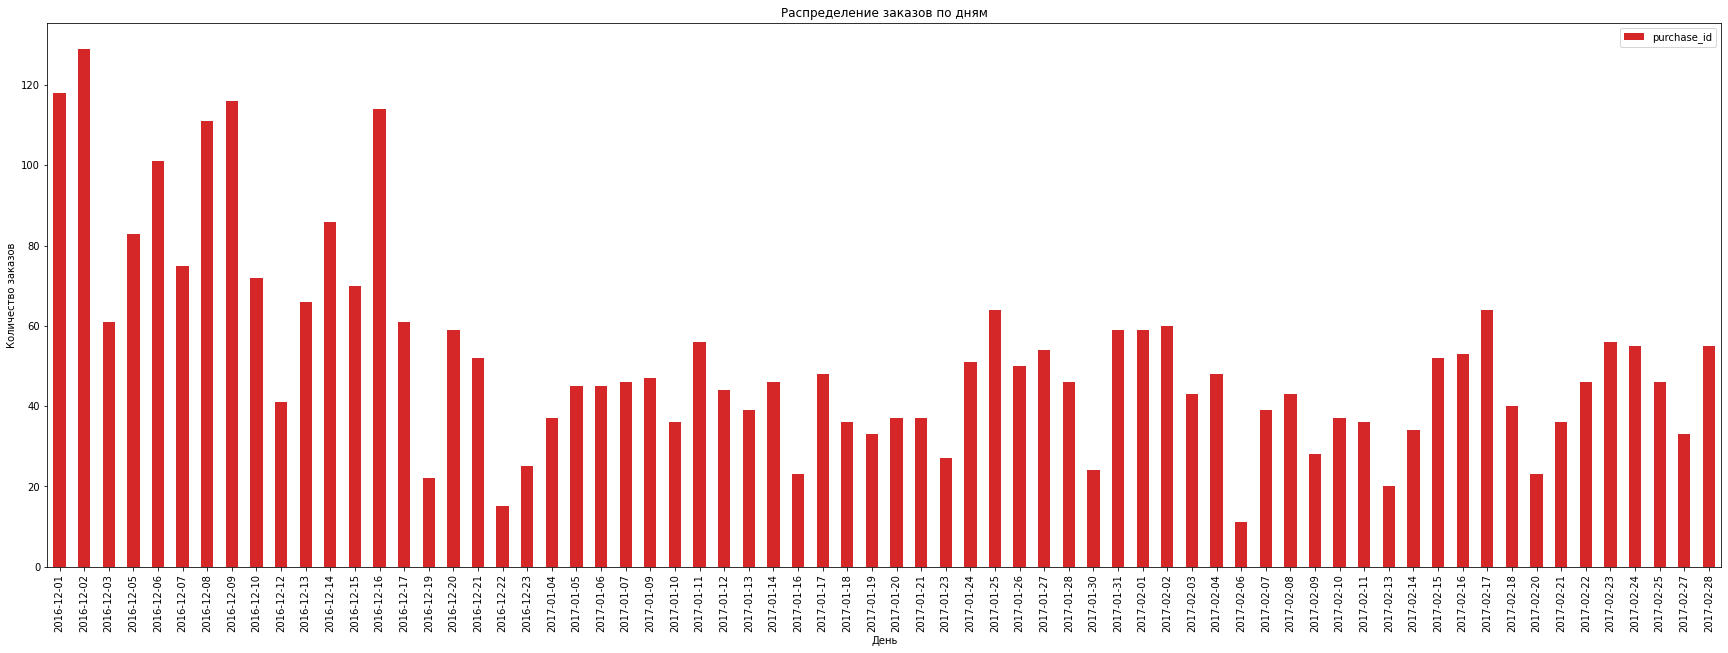

In [22]:
data.pivot_table(index = 'purchase_day', values = 'purchase_id', aggfunc = 'nunique').plot(kind = 'bar', figsize = (30, 10), color = 'tab:red')
plt.title('Распределение заказов по дням')
plt.xlabel('День')
plt.ylabel('Количество заказов')
plt.show()

Наибольшее количество заказов было в декабре.

### Посмотрю на распределение заказов по месяцам
<a id="p3-2"></a>

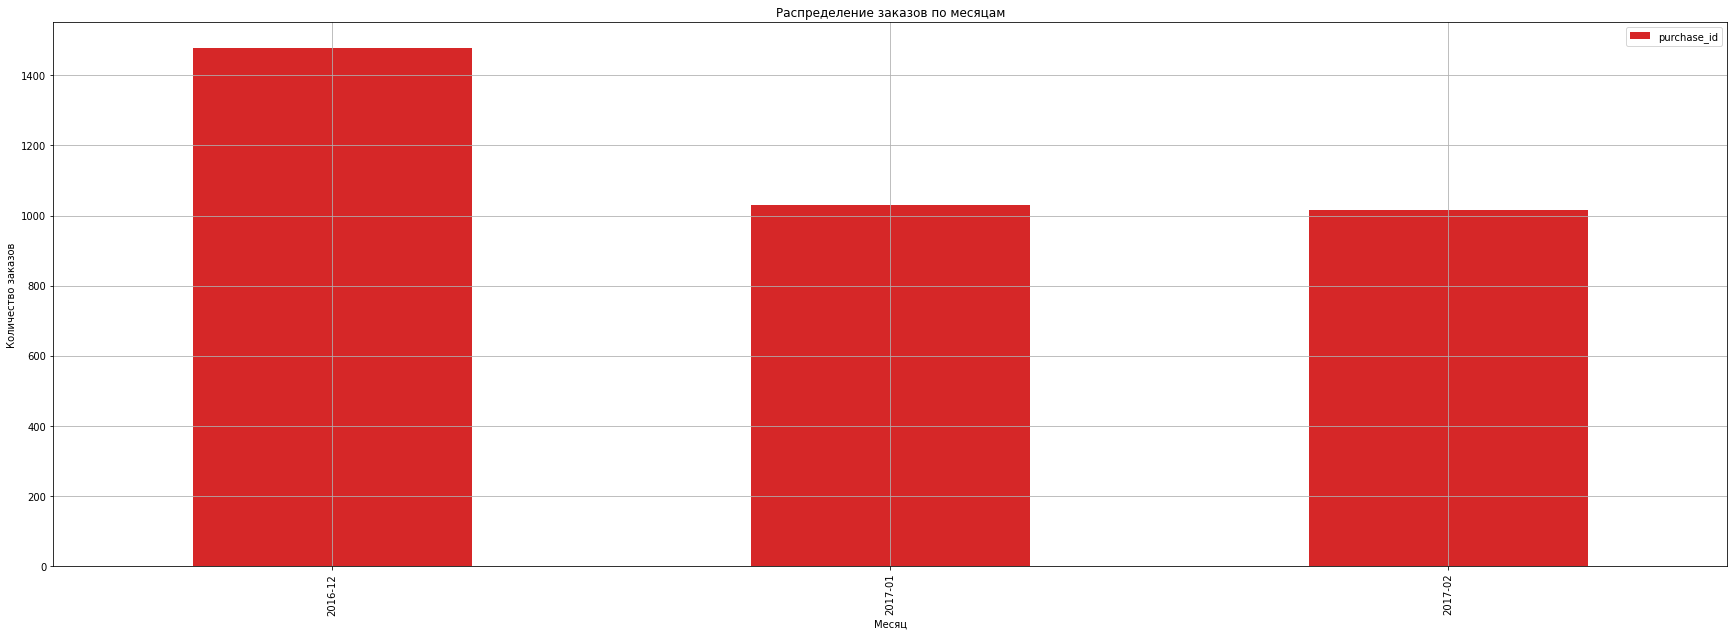

In [23]:
data.pivot_table(index = 'purchase_month', values = 'purchase_id', aggfunc = 'nunique').plot(kind = 'bar', figsize = (30, 10), color = 'tab:red', grid = True)
plt.title('Распределение заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.show()

График соотносится с прошлым - наибольшее количество заказов было в декабре

В январе и феврале количество заказов примерно одинаковое

### Посмотрю на график количества покупок
<a id="p3-3"></a>

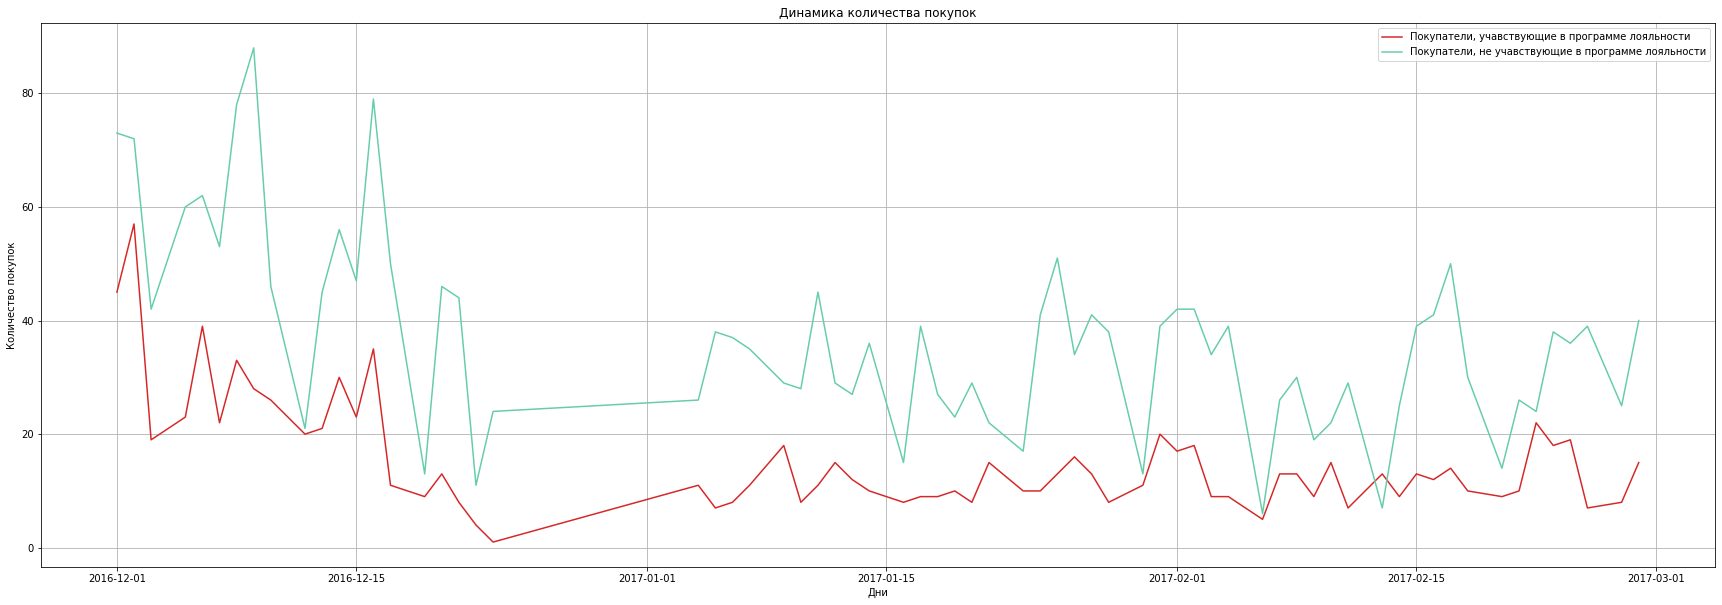

In [24]:
purchase = data.pivot_table(index = ['purchase_day', 'loyalty_program'], values = 'purchase_id', aggfunc = 'nunique').reset_index()
fig = plt.figure(figsize = (30, 10))
graph = fig.add_subplot()
purchase.query('loyalty_program == 1').plot(x = 'purchase_day', y = 'purchase_id', ax = graph, label = 'Покупатели, учавствующие в программе лояльности', color = 'tab:red')
purchase.query('loyalty_program == 0').plot(x = 'purchase_day', y = 'purchase_id', ax = graph, label = 'Покупатели, не учавствующие в программе лояльности', color = '#66CDAA')
graph.set_title('Динамика количества покупок')
graph.set_xlabel('Дни')
graph.set_ylabel('Количество покупок')
graph.grid(True)

Наибольшее количество покупок стабильно совершается клиентами, которые не учавствуют в программе лояльности. 

### Посмотрю на график суммы покупок
<a id="p3-4"></a>

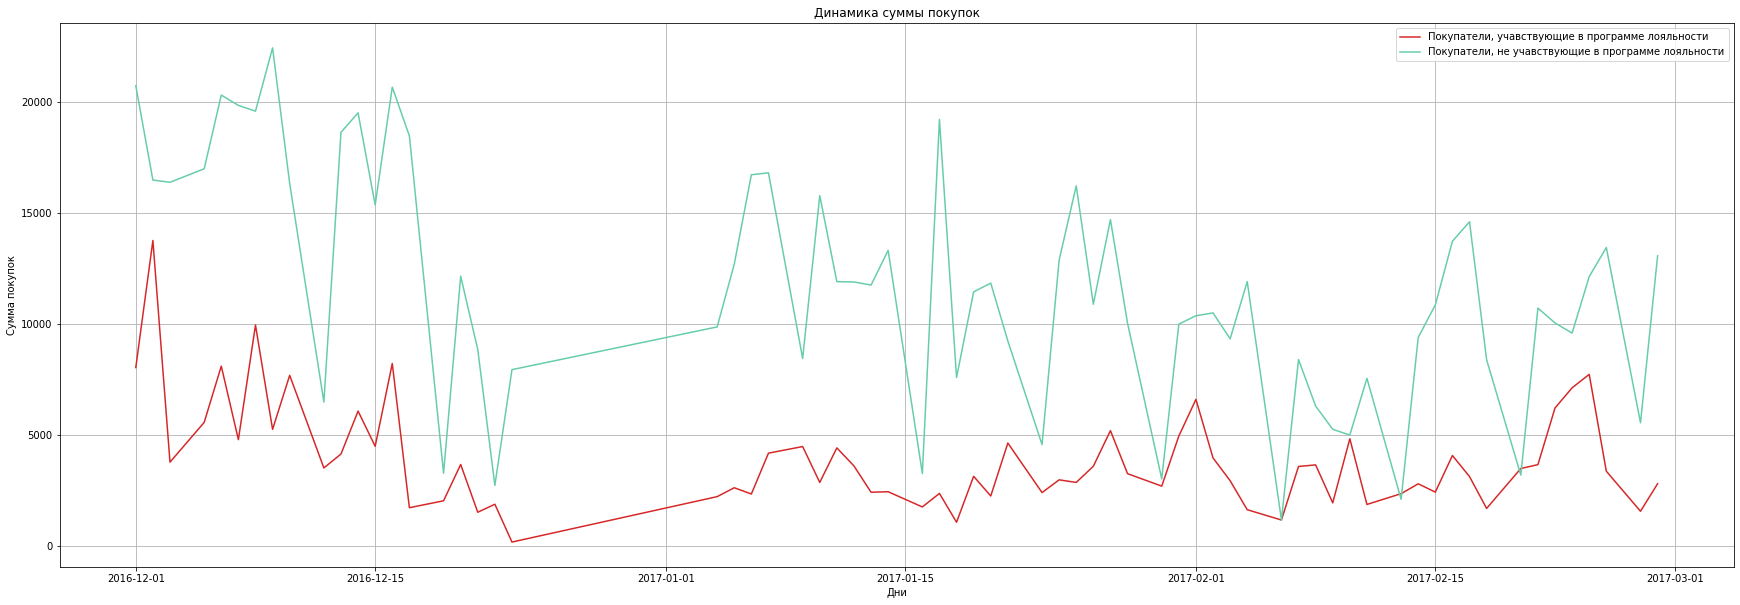

In [25]:
revenue = data.pivot_table(index = ['purchase_day', 'loyalty_program'], values = 'revenue', aggfunc = 'sum').reset_index()
fig = plt.figure(figsize = (30, 10))
graph = fig.add_subplot()
revenue.query('loyalty_program == 1').plot(x = 'purchase_day', y = 'revenue', ax = graph, label = 'Покупатели, учавствующие в программе лояльности', color = 'tab:red')
revenue.query('loyalty_program == 0').plot(x = 'purchase_day', y = 'revenue', ax = graph, label = 'Покупатели, не учавствующие в программе лояльности', color = '#66CDAA')
graph.set_title('Динамика суммы покупок')
graph.set_xlabel('Дни')
graph.set_ylabel('Сумма покупок')
graph.grid(True)

Покупатели, которые не учавствуют в программе лояльности, стабильно тратят больше.

### Посмотрю на график количества купленных товаров
<a id="p3-5"></a>

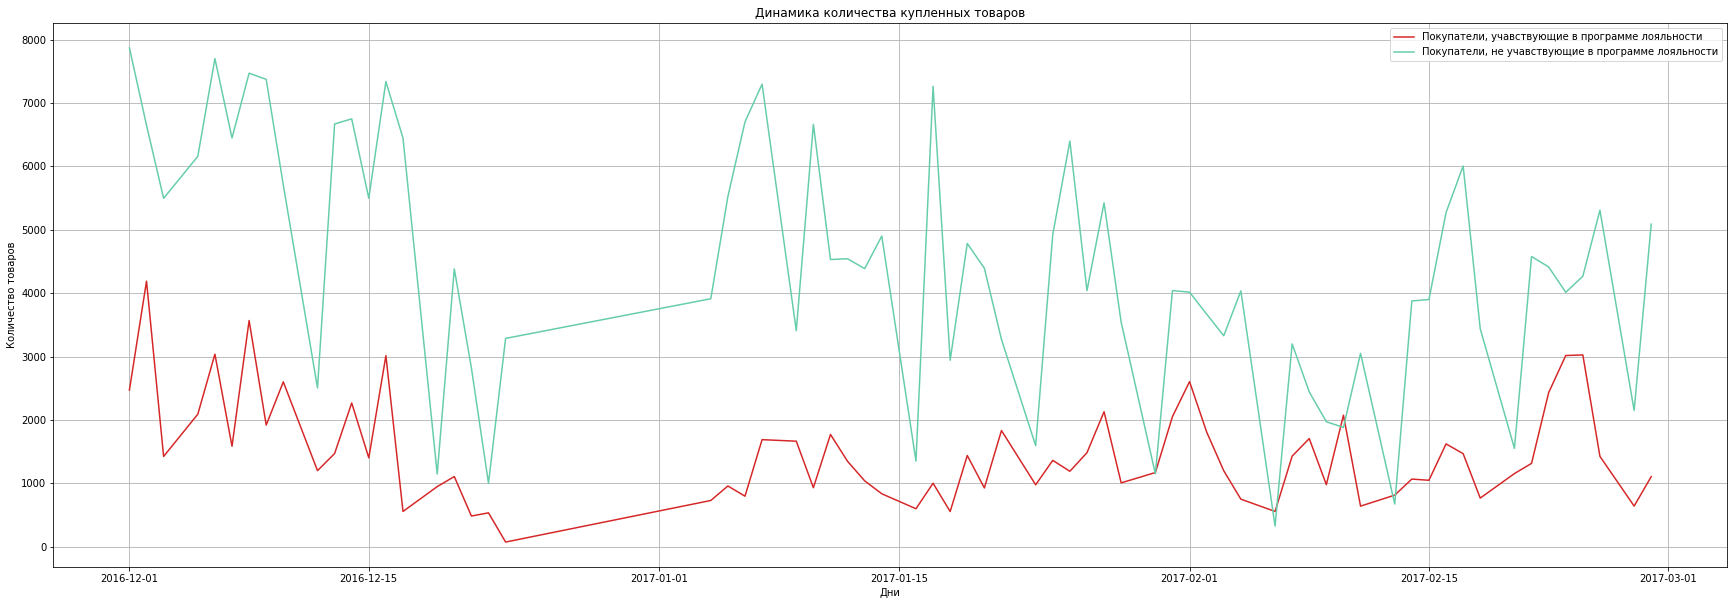

In [26]:
quantity = data.pivot_table(index = ['purchase_day', 'loyalty_program'], values = 'quantity', aggfunc = 'sum').reset_index()
fig = plt.figure(figsize = (30, 10))
graph = fig.add_subplot()
quantity.query('loyalty_program == 1').plot(x = 'purchase_day', y = 'quantity', ax = graph, label = 'Покупатели, учавствующие в программе лояльности', color = 'tab:red')
quantity.query('loyalty_program == 0').plot(x = 'purchase_day', y = 'quantity', ax = graph, label = 'Покупатели, не учавствующие в программе лояльности', color = '#66CDAA')
graph.set_title('Динамика количества купленных товаров')
graph.set_xlabel('Дни')
graph.set_ylabel('Количество товаров')
graph.grid(True)

Покупатели, которые не учавствуют в программе лояльности, стабильно покупают большее количество товаров.

В моем распоряжении данных за 3 месяца: Декабрь, Январь и Февраль.

Больше всего покупок было в декабре, в следующие месяцы количество покупок выравнивается.

Клиенты поделены на 2 группы - Использующие программу лояльности и не использующие.
Предварительно можно сказать, что
- Определяющие количество покупок совершают клиенты, не использующие программу лояльности
- Клиенты, которые не используют программу лояльности, стабильно совершают покупки на большую сумму
- Количество товаров в корзине покупателя, не использующего программу лояльности, стабильно больше

## Исследование ритейл-метрик
<a id="p4"></a>

### Посмотрю на динамику среднего чека
<a id="p4-1"></a>

In [27]:
print('Средний чек для клиентов не использующих программу лояльности:',
round(data[data['loyalty_program'] == 0].groupby('purchase_id')['revenue'].sum().mean(),2))
print('Средний чек для клиентов, использующих программу лояльности:',
round(data[data['loyalty_program'] == 1].groupby('purchase_id')['revenue'].sum().mean(),2))

Средний чек для клиентов не использующих программу лояльности: 317.2
Средний чек для клиентов, использующих программу лояльности: 256.0


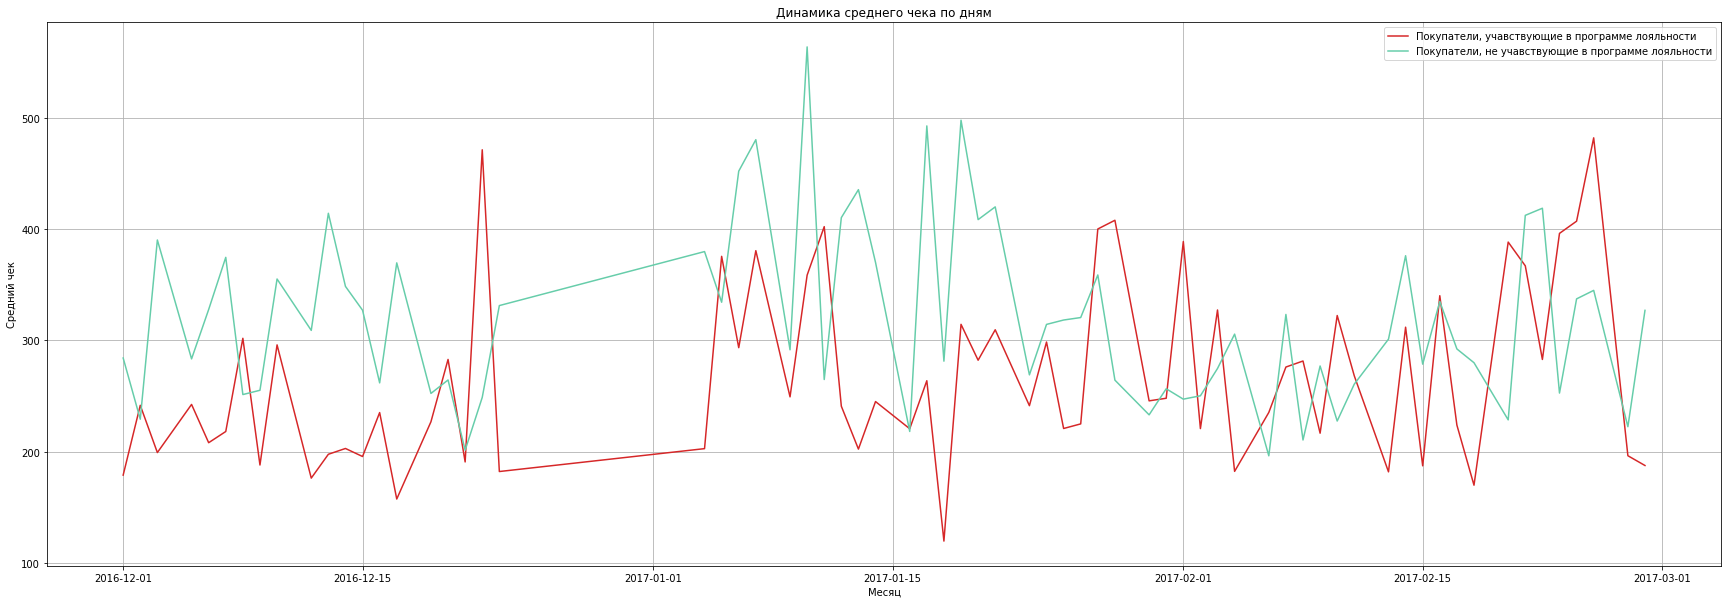

In [28]:
listok = []
for a in data['purchase_day'].unique():
    listok.append([a, data[(data['purchase_day'] == a)&(data['loyalty_program'] == 1)].groupby('purchase_id')['revenue'].sum().mean()])
loy = pd.DataFrame(listok).sort_values(0)
loy.columns = ['day', 'avg_bill']
listok = []
for a in data['purchase_day'].unique():
    listok.append([a, data[(data['purchase_day'] == a)&(data['loyalty_program'] == 0)].groupby('purchase_id')['revenue'].sum().mean()])
no_loy = pd.DataFrame(listok).sort_values(0)
no_loy.columns = ['day', 'avg_bill']

fig = plt.figure(figsize = (30, 10))
graph = fig.add_subplot()
loy.plot(x = 'day', y = 'avg_bill', ax = graph, label = 'Покупатели, учавствующие в программе лояльности', color = 'tab:red')
no_loy.plot(x = 'day', y = 'avg_bill', ax = graph, label = 'Покупатели, не учавствующие в программе лояльности', color = '#66CDAA')
graph.set_title('Динамика среднего чека по дням')
graph.set_xlabel('Месяц')
graph.set_ylabel('Средний чек')
graph.grid(True)

В декабре и Январе средний чек выше у клиентов, которые не учавствуют в программе лояльности

К Февралю средний чек пришел в равновесие.

### LTV
<a id="p4-2"></a>

In [29]:
# Создаю профили пользователей
profiles = get_profiles(data)
# Определяю максимальную и минимальную даты
print('Минимальная дата', profiles['first_ts'].min())
print('Максимальная дата', profiles['first_ts'].max())

Минимальная дата 2016-12-01 08:26:00
Максимальная дата 2017-02-28 17:01:00


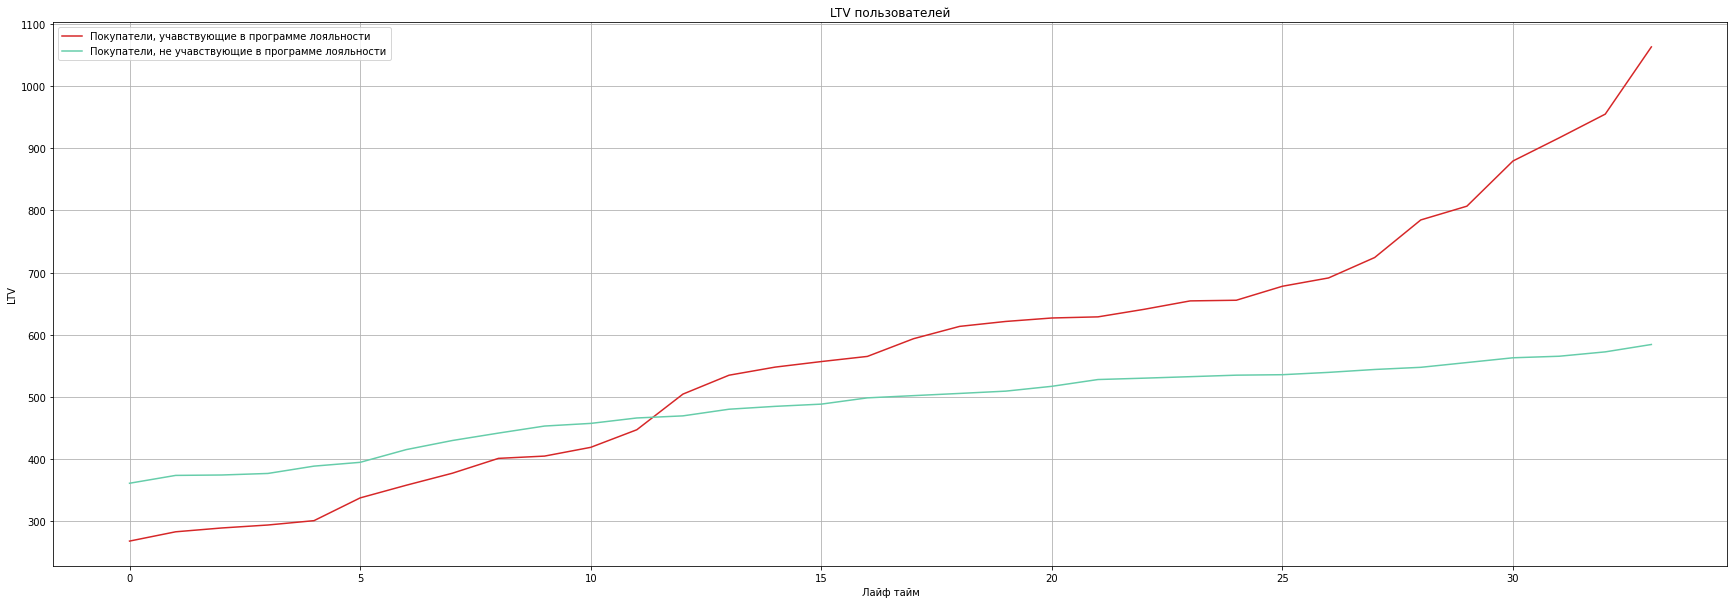

In [30]:
# Задаю момент и горизонт анализа
observation_date = datetime(2017, 2, 28).date()
horizon_days = 34
# Нахожу LTV
ltv_raw_no_loy, ltv_no_loy, ltv_history_no_loy = get_ltv(
    profiles[profiles['loyalty_program'] == 0], data, observation_date, horizon_days)
ltv_raw_loy, ltv_loy, ltv_history_loy = get_ltv(
    profiles[profiles['loyalty_program'] == 1], data, observation_date, horizon_days)
ltv_loy = ltv_loy.drop(columns=['cohort_size'])
ltv_no_loy = ltv_no_loy.drop(columns=['cohort_size'])
# Строю график
fig = plt.figure(figsize = (30, 10))
graph = fig.add_subplot()
ltv_loy.T.plot(ax = graph, label = 'Покупатели, учавствующие в программе лояльности', color = 'tab:red')
ltv_no_loy.T.plot(ax = graph, label = 'Покупатели, не учавствующие в программе лояльности', color = '#66CDAA')
graph.set_title('LTV пользователей')
graph.legend(['Покупатели, учавствующие в программе лояльности', 'Покупатели, не учавствующие в программе лояльности'])
graph.set_xlabel('Лайф тайм')
graph.set_ylabel('LTV')
graph.grid(True)

По показателю LTV изначальными лидерами являются клиенты, не учавствующие в программе лояльности. На 12 день жизни клиенты, учавствующие в программе лояльности, уверенно опережают обычных покупателей. К 30 дню жизни, клиенты с картами лояльности операжают обычным клиентов почти в 2 раза.

### Retention Rate
<a id="p4-3"></a>

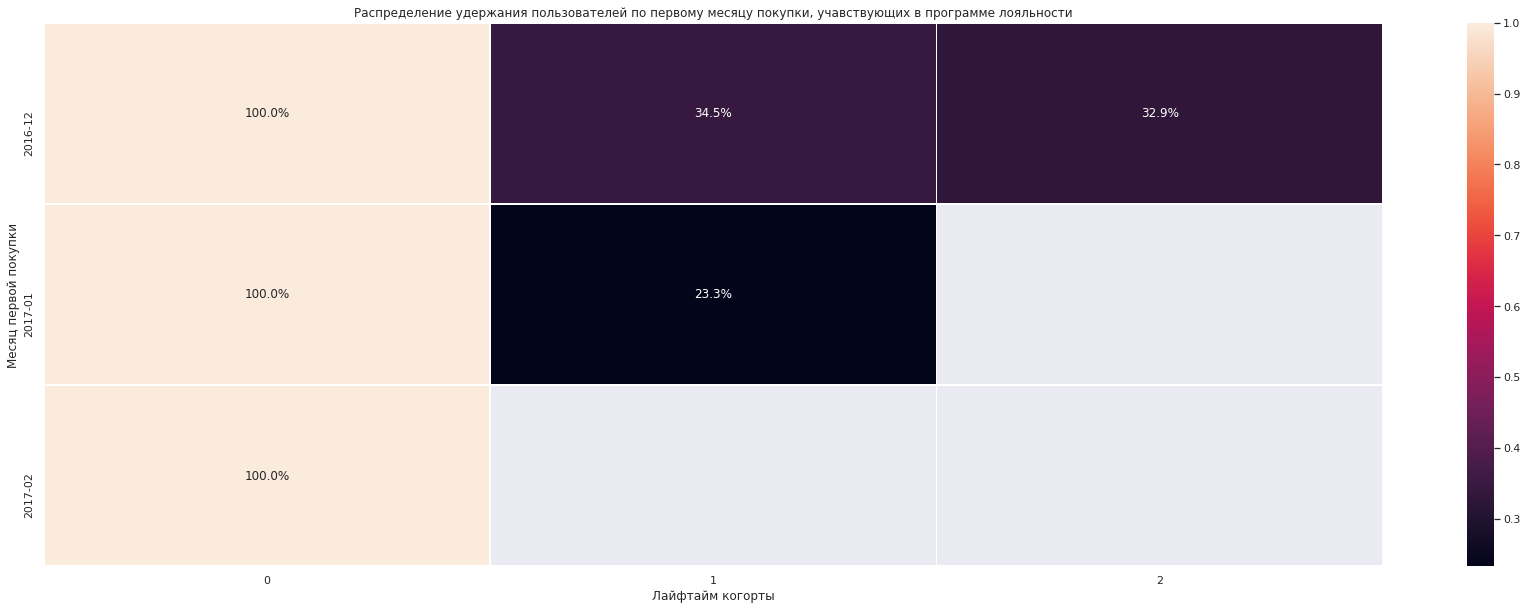

In [31]:
cohorts = data.groupby(['loyalty_program', 'first_order_month', 'lifetime']).agg({'customer_id' : 'nunique'}).reset_index()
users = cohorts[cohorts['lifetime'] == 0][['first_order_month', 'customer_id', 'loyalty_program']]
users = users.rename(columns = {'customer_id' : 'cohort_users'})
cohorts = cohorts.merge(users,on = ['first_order_month', 'loyalty_program'])
cohorts['retention'] = cohorts['customer_id'] / cohorts['cohort_users']
retention_loy = cohorts.query('loyalty_program == 1').pivot_table(index = 'lifetime', values = 'retention', aggfunc = 'sum').fillna(0).reset_index()
retention_no_loy = cohorts.query('loyalty_program == 0').pivot_table(index = 'lifetime', values = 'retention', aggfunc = 'sum').fillna(0).reset_index()
retention_pivot = cohorts.query('loyalty_program == 1').pivot_table(index='first_order_month',columns='lifetime',values='retention',aggfunc='sum')
sns.set(style='dark')
plt.figure(figsize=(30, 10))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1)
plt.xlabel('Лайфтайм когорты')
plt.ylabel('Месяц первой покупки')
plt.title('Распределение удержания пользователей по первому месяцу покупки, учавствующих в программе лояльности')
plt.show()

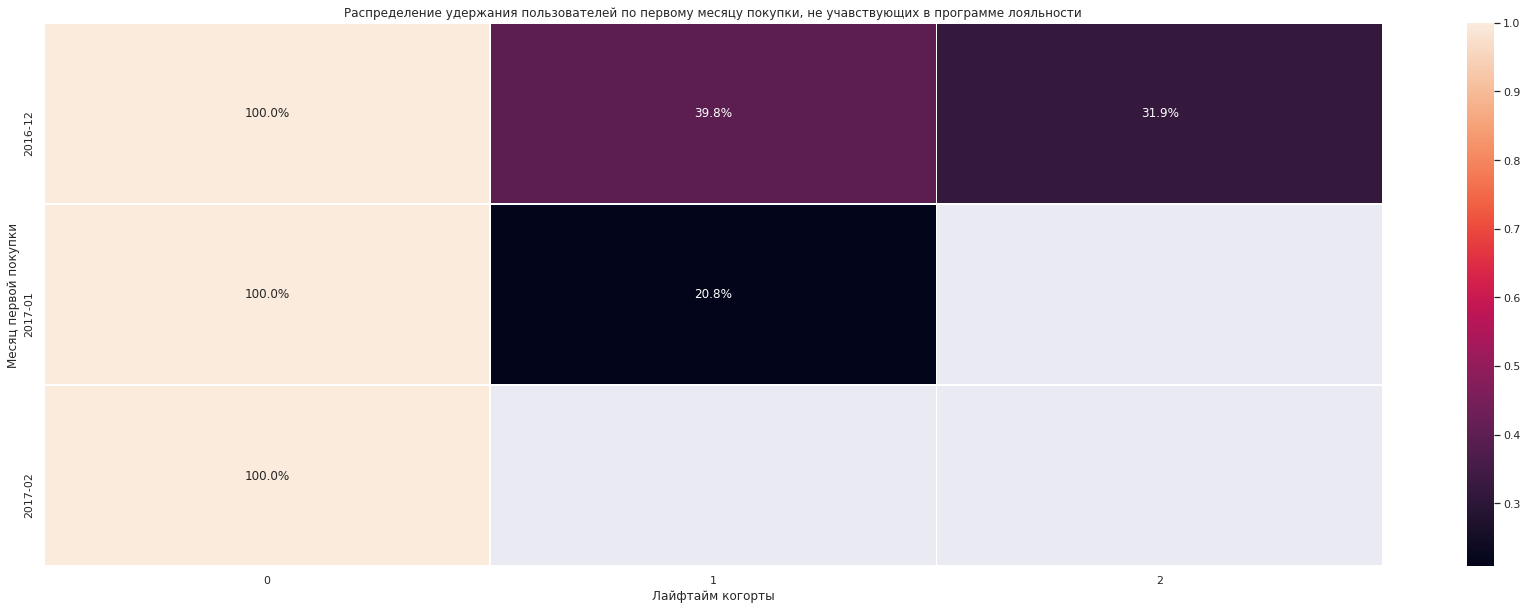

In [32]:
retention_pivot = cohorts.query('loyalty_program == 0').pivot_table(index='first_order_month',columns='lifetime',values='retention',aggfunc='sum')
sns.set(style='dark')
plt.figure(figsize=(30, 10))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1)
plt.xlabel('Лайфтайм когорты')
plt.ylabel('Месяц первой покупки')
plt.title('Распределение удержания пользователей по первому месяцу покупки, не учавствующих в программе лояльности')
plt.show()

Данные об удержании клиентов магазина сгруппированы по месяцу первой покупки и жизни клиентов в месяцах. Данные разделены на две тепловые карты для клиентов, которые использую программу лоялльности и обычных.

На графиках мы видим, что декабрьская когорта клиентов, не участвующих в программе лояльности, в Январе показала результат выше - 39.8% (34.5% для программы лояльности), однако в Феврале оказалась немного ниже и составила 31.9% (32.9% для программы лояльности)

В январской когорте лидерами оказались клиенты, использующие программу лояльности - 23.3% (для обычных клиентов показатель составил 20.8%)

Февральская когорта еще не успела прожить следующий месяц.

На основании общих данных, можно сделать вывод, что по коэффициенту удержания клиенты, использующие программу лояльсноти, немного опережают обычных. 

## Проверка гипотез
<a id="p5"></a>

### Гипотеза о равестве расходов между группами
<a id="p5-1"></a>

Нулевая гипотеза: Расходы у клиентов использующих программу лояльности и не использующих, равны. 

Альтернативная: Расходы у клиентов использующих программу лояльности и не использующих, не равны.

Необходимо определиться с выбором метода проверки гипотезы. Проверю даные на нормальность распределения.

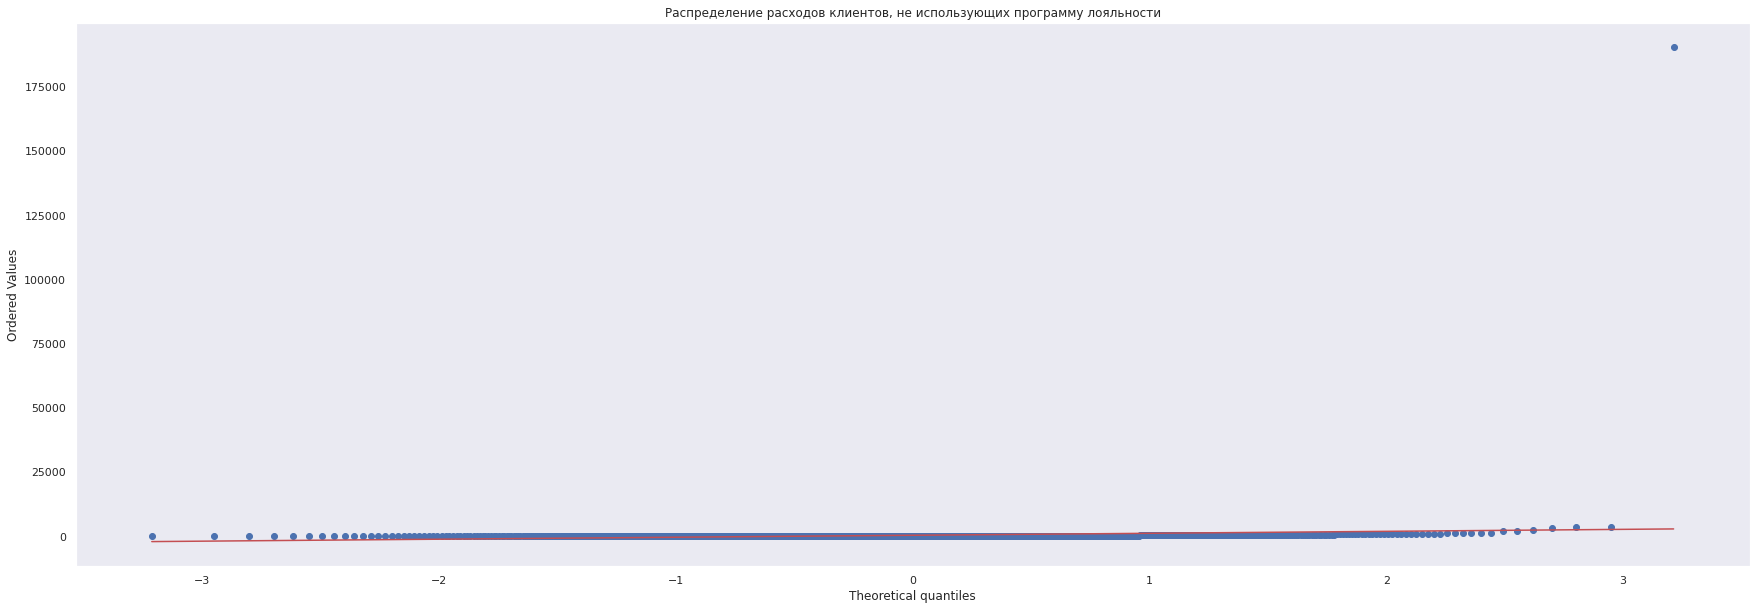

In [33]:
group_test = data.groupby(by = ['customer_id', 'loyalty_program']).agg({'purchase_id' : 'nunique', 'price' : 'sum'}).reset_index()
fig = plt.figure(figsize = (30, 10))
ax = fig.add_subplot()
res = st.probplot(group_test[group_test['loyalty_program'] == 0]['price'], plot = ax)
ax.set_title('Распределение расходов клиентов, не использующих программу лояльности')
plt.show()

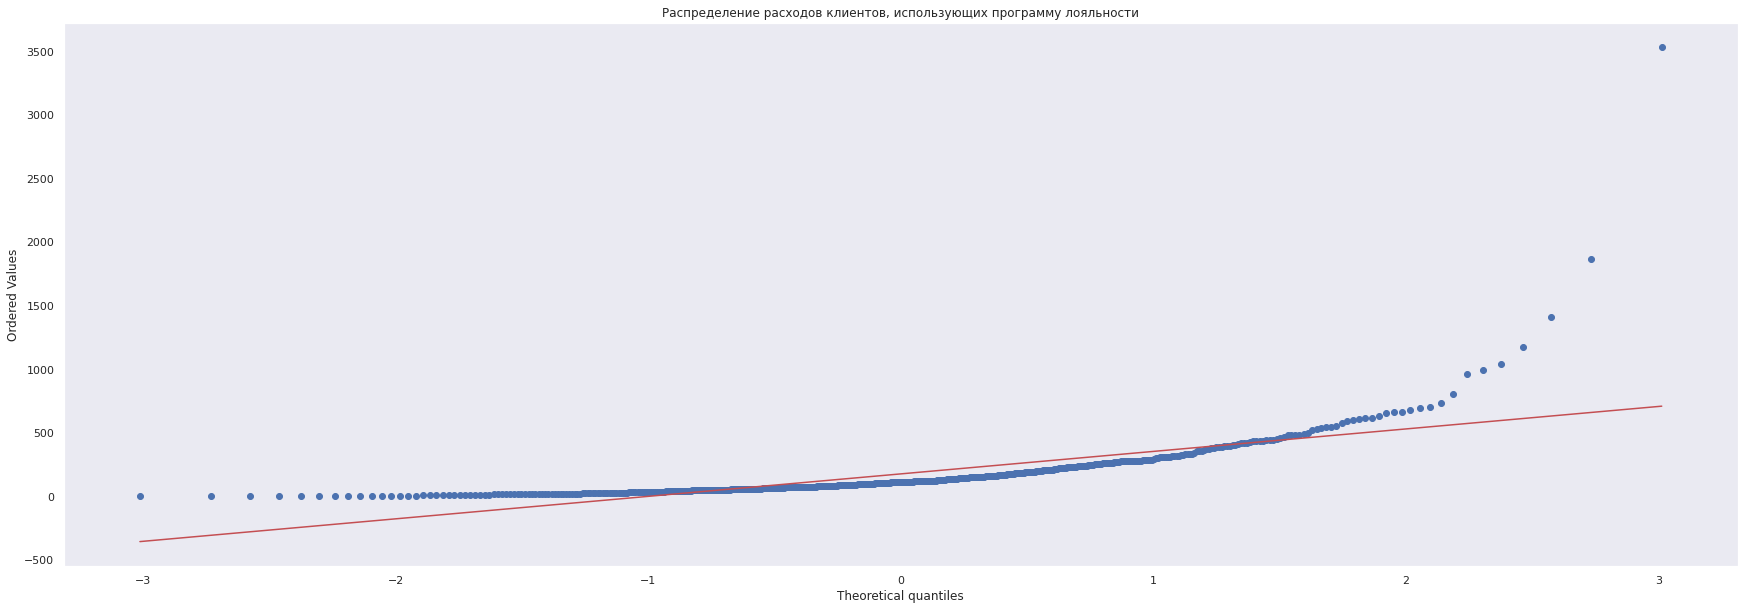

In [34]:
fig = plt.figure(figsize = (30, 10))
ax = fig.add_subplot()
res = st.probplot(group_test[group_test['loyalty_program'] == 1]['price'], plot = ax)
ax.set_title('Распределение расходов клиентов, использующих программу лояльности')
plt.show()

Данные не соответствуют нормальному распределению, для проверки гипотезы необходимо применить метод Манна-Уитни

In [35]:
test = data.groupby(by = ['loyalty_program', 'customer_id']).agg({'purchase_id': 'nunique', 'revenue': 'sum'}).reset_index()
results = st.mannwhitneyu(
    test[test['loyalty_program'] == 0]['revenue'],
    test[test['loyalty_program'] == 1]['revenue'])
# alpha = задаем значение уровня значимости
alpha = 0.05
print('Значение p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, есть статистически значимые различия в расходах между группами")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет статистически значимых различий в расходах между группами")

Значение p-value: 0.034726767078024565
Отвергаем нулевую гипотезу, есть статистически значимые различия в расходах между группами


Исходя из теста, есть статистически значмая разница между расходами клиентов.

### Гипотеза о равестве среднего количества покупок между группами
<a id="p5-2"></a>

Нулевая гипотеза: Среднее колиество покупок у клиентов использующих программу лояльности и не использующих, равны.

Нулевая гипотеза: Средние колиество покупок у клиентов использующих программу лояльности и не использующих, не равны.

Определюсь с выбором метода проверки гипотезы - проверю даные на нормальность распределения.

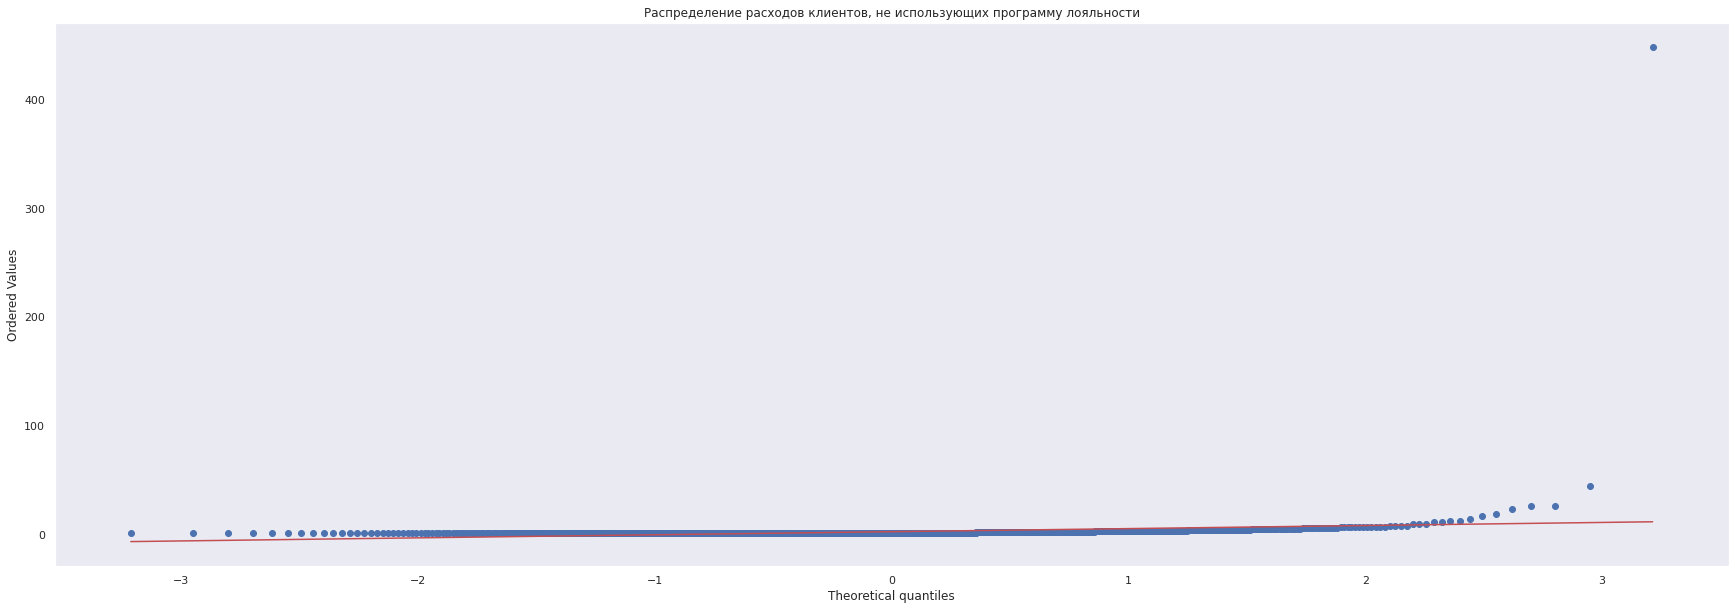

In [36]:
fig = plt.figure(figsize = (30, 10))
ax = fig.add_subplot()
res = st.probplot(group_test[group_test['loyalty_program'] == 0]['purchase_id'], plot = ax)
ax.set_title('Распределение расходов клиентов, не использующих программу лояльности')
plt.show()

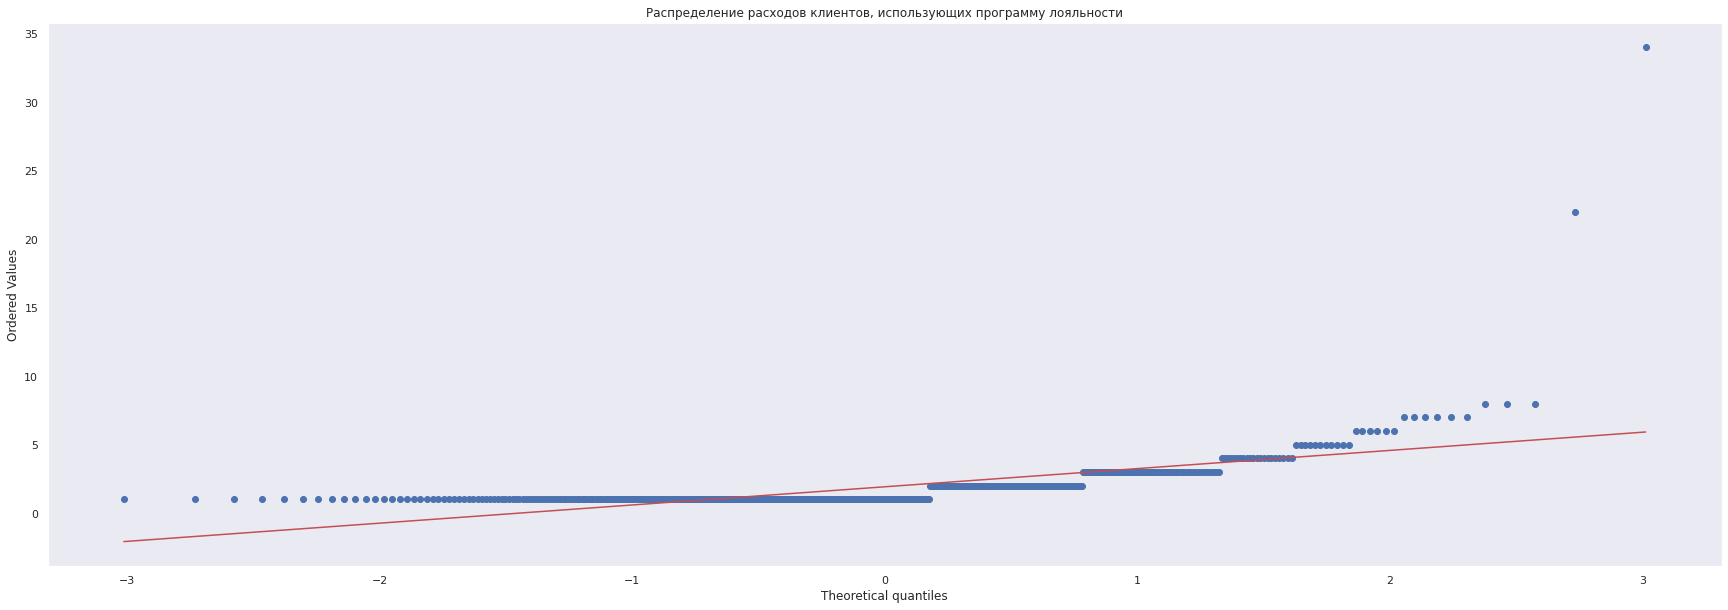

In [37]:
fig = plt.figure(figsize = (30, 10))
ax = fig.add_subplot()
res = st.probplot(group_test[group_test['loyalty_program'] == 1]['purchase_id'], plot = ax)
ax.set_title('Распределение расходов клиентов, использующих программу лояльности')
plt.show()

Данные так же не соответствуют нормальному распределению, для проверки гипотезы необходимо применить метод Манна-Уитни

In [38]:
results = st.mannwhitneyu(
    test[test['loyalty_program'] == 0]['purchase_id'],
    test[test['loyalty_program'] == 1]['purchase_id'])
# alpha = задаю значение уровня значимости
alpha = 0.05
print('Значение p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, есть статистически значимые различия в количестве покупок между группами")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет статистически значимых различий в количестве покупок между группами")

Значение p-value: 0.03297195156433674
Отвергаем нулевую гипотезу, есть статистически значимые различия в количестве покупок между группами


Исходя из теста, статистически значимая разница между количеством покупок есть.

## Общий вывод
<a id="p6"></a>

В моем распоряжении было два датасета - с информацией о покупках и ценах на товар. 

В первую очередь, ознакомился с данными и выполнил работу по предобработке.

Далее приступил к анализу клиентов магазина. Перед нами стояла задача выяснить, как программа лояльности влият на поведение клиентов. Я определил 2 ключевых вопроса для анализа клиентов:
- Кто приносит больше денег? Участники программы лояльности или обычные клиенты?
- Кто совершает больше покупок?

В нашем распоряжении данные о покупках за три месяца - Декабрь, Январь и Февраль. Лидером по количеству продаж стал Декабрь, далее продажи идут на снижение и стабилизируются. 

Разделил клиенто на 2 группы по использованию программы лояльности, определил, что
- По количеству покупок лидируют обычные покупатели
- По сумме покупок лидируют также обычные покупатели
- По количеству купленных товаров лидирую обычные покупатели.
- По среднему чеку лидируют все теже обычные покупатели, однако рассмотрев динамику среднего чека определил, что за последний месяц средние чеки стали равны.
- LTV клиентов, не использующих программу лояльгости, до 12 дня жизни выше, однако, далее клиенты, использующие программу лояльности, опережают обычных клиентов и к 30 дню их показатель почти в 2 раза выше.
- Retention Rate у клиентов, использующих программу лояльности, немного выше, чем у обычных покупателей.

Проверка гипотез на статистическую значимость:
- Определил первую гипотезу о равестве расходов между группами. Тест показал, статистически значимая разница в расходах между группами есть.
- Определил вторую гипотезу о равестве среднего количества покупок между группами. Тест показал, что статистически значимая разница между количеством покупок есть.

Можно сделать вывод, что на данном этапе, преимущества программы лояльности не очевидны. По всем показателям обычные клиенты превосходят пользователей программы лояльности. Удержание клиентов, использующих программу лояльности, лишь немного опережает обычных покупателей - оно практиччески равно. Показатель LTV опережает обычных покупателей к 12 дню жизни. Можно либо констатировать, что действующая программа лояльности не показала своей эффективности, либо необходимо увеличить период наблюдения за клиентами. 

Возможно, что в данном магазине программой лояльности пользуются клиенты, которые в любом случае купили бы товар, то есть покупка не была простимулированна маркетинговой акцией. Необходима корреция правил программы лояльности.

# Загрузка датасета для построения дашборда

In [ ]:
#data.to_csv('data_csv', index = False)
#from IPython.display import display, FileLink
#FileLink('data_csv')